In [27]:
## testing PER_beahvior

## rewriting scipy peaks with a library


# import stuff
import peaks #my library

import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
import os
os.listdir(os.getcwd())
import csv as csv
import json as json
import scipy as scipy
from scipy.signal import find_peaks
import h5py


##### get paths ##########
date = '20230616'
fly_id_date_code = f'b-{date[-4:]}' ##'b-0407'

#Path = 'G:/bruker vid 2023/20230407/results/'  #path to results files from read ROIs or DLC
Path = f'E:/bruker_vid_2023/{date}/results/'  #path to results files from read ROIs or DLC

SavePath = Path + 'h5_files/'
peaks.make_dirs(SavePath)


####   mostly static variables  ########
data_reducer = 100
voltage_framerate = 10000/data_reducer #frames/s # 1frame/.1ms * 1000ms/1s = 10000f/s
#with reducer i get 1 frame for every .1 * 100 ms => frame/.1*100 ms * 1000ms/s = 100f/s
#each "frame" is 0.1ms
video_framerate = 200 #f/s
video_framerate = 38.02
#video_framerate_downstairs = 33

video_framerate = 38.02
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]
print('not dlc', h5files)
dlc_h5_file = "C:/Users/ashsm/Documents/Stanford/bruker behavior/h5files_dlc/20230616_fly2_dlc.h5"
roi_h5_file = os.path.join(SavePath, '20230616_fly_number_2_.h5')
print(roi_h5_file)

voltage_path = "C:/Users/ashsm/Documents/Stanford/bruker behavior/voltage/20230616/"
voltage_file = "C:/Users/ashsm/Documents/Stanford/bruker behavior/voltage/20230616/fly2_func-001_Cycle00001_VoltageRecording_001.csv"

not dlc ['20230616_fly_number_1_.h5', '20230616_fly_number_2_.h5', '20230616_fly_number_3_.h5', '20230616_fly_number_4_.h5']
E:/bruker_vid_2023/20230616/results/h5_files/20230616_fly_number_2_.h5


In [ ]:





#

files = os.listdir(Path)
voltage_files = peaks.check_for_voltage_file(voltage_path)
print(voltage_files)
roi_files = peaks.check_for_results_file(Path)

#look at voltage and roi files and add data to h5 file based on fly#
# if roi_files is not None:
#     for roi_file in roi_files:
#         fly_number = peaks.find_fly_number(roi_file)
#         h5_filename = f'{date}_fly_number_{fly_number}_.h5'
#         h5_Path = os.path.join(SavePath, h5_filename)
#         data = peaks.import_roi_results(os.path.join(Path, roi_file))
#         peaks.add_to_h5(h5_Path, 'roi data', data)
#         if peaks.check_for_key(h5_Path, 'fly-id') == False:
#             fly_id = f'{fly_id_date_code}-{fly_number}'
#             peaks.add_to_h5(h5_Path, 'fly-id', fly_id)
        

if voltage_files is not None:
    for voltage_file in voltage_files:
        fly_number = peaks.find_fly_number(voltage_file)
        h5_filename = f'{date}_fly_number_{fly_number}_.h5'
        print(f'found voltage file {voltage_file} for fly {fly_number}')
        h5_Path = os.path.join(SavePath, h5_filename)
        data = peaks.import_voltage_data(os.path.join(voltage_path, voltage_file))
        #peaks.add_to_h5(h5_Path, 'voltage data', data)
        titles = peaks.get_mean_titles(data)
        print(titles)
        print(type(titles))
        with h5py.File(h5_Path, 'a') as f:
            dt = h5py.special_dtype(vlen=str)
            if 'voltage_header' in f.keys():
                del f['voltage_header']
            new_titles = [title.encode('utf-8', 'surrogateescape') for title in titles[0][0]]
            dset = f.create_dataset('voltage_header', len(titles[0][0]), dtype=dt, data = new_titles)
            if 'voltage data st' in f.keys():
                del f['voltage data st']
            dset = f.create_dataset('voltage data st', np.shape(data), dtype=dt, data = data)
            

            #f.attrs["voltage header"] = titles[0][0]
        #peaks.add_to_h5(h5_Path, 'voltage header', titles[0][0])
        if peaks.check_for_key(h5_Path, 'fly-id') == False:
            fly_id = f'{fly_id_date_code}-{fly_number}'
            peaks.add_to_h5(h5_Path, 'fly-id', fly_id)


#set framerate
 # **!!  change so code just asks is voltage framerate or video framerate needed


#set interval time
##since most of my experiments are switch do I need this?
interval_time = None ##decide if I should change this later

#set fly numbers 
# #(should be set when import data)


#get peaks for light and PER
##look at every flies h5 file and open and run peaks 
#    (note: some light data may be in roi file)
#  if there is more than one mean in the data then it will return a list of list of peaks for each mean

##make plots

#smooth PER peaks 

#find onset of PER peaks
#find indiv

#

info on attributes
Attributes work just like groups and datasets. Use object.attrs.keys() to iterate over the attribute names. The object could be a file, group or dataset.

Here is a simple example that creates 2 attributes on 3 different objects, then reads and prints them.

arr = np.random.randn(1000)

with h5py.File('groups.hdf5', 'w') as f:
    g = f.create_group('Base_Group')
    d = g.create_dataset('default', data=arr)

    f.attrs['User'] = 'Me'
    f.attrs['OS'] = 'Windows'

    g.attrs['Date'] = 'today'
    g.attrs['Time'] = 'now'

    d.attrs['attr1'] = 1.0
    d.attrs['attr2'] = 22.2
    
    for k in f.attrs.keys():
        print(f"{k} => {f.attrs[k]}")
    for k in g.attrs.keys():
        print(f"{k} => {g.attrs[k]}")
    for k in d.attrs.keys():
        print(f"{k} => {d.attrs[k]}")

    print('*****')
    
    for k in f.attrs.keys():
        print(f"{k} => {f.attrs[k]}")
    for k in f['Base_Group'].attrs.keys():
        print(f"{k} => {f['Base_Group'].attrs[k]}")
    for k in f['Base_Group']['default'].attrs.keys():
        print(f"{k} => {f['Base_Group']['default'].attrs[k]}")

In [ ]:
print(np.shape(titles))
print(titles[0][0])

In [ ]:
##cureently trying to import voltage to sort out framerate
##then see if flies respond to light ok
##see if I can get light times from voltage data--running voltage peaks

E:/bruker_vid_2023/20230616/results/h5_files/20230616_fly_number_1_.h5
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'voltage data', 'voltage data st', 'voltage_header']>
b'b-0616-1'
E:/bruker_vid_2023/20230616/results/h5_files/20230616_fly_number_2_.h5
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'roi data', 'roi peak left bases', 'roi peak prominences', 'video framerate', 'voltage data', 'voltage data st', 'voltage_header']>
b'b-0616-2'
True
(200652, 1)
titles are [array([b'Mean(PER_fly2)'], dtype='|S14')]
mean titles are b'Mean(PER_fly2)'
PER
(1, 5181)


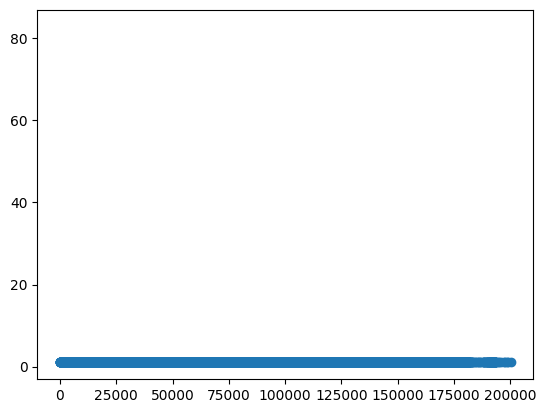

E:/bruker_vid_2023/20230616/results/h5_files/20230616_fly_number_3_.h5
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'roi data', 'roi peak left bases', 'roi peak prominences', 'video framerate', 'voltage data', 'voltage data st', 'voltage_header']>
b'b-0616-3'
True
(69081, 1)
titles are [array([b'Mean(PER_fly3)'], dtype='|S14')]
mean titles are b'Mean(PER_fly3)'
PER
(1, 2465)


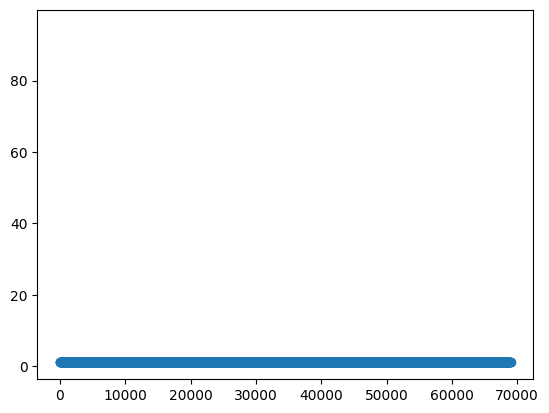

E:/bruker_vid_2023/20230616/results/h5_files/20230616_fly_number_4_.h5
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'roi data', 'roi peak left bases', 'roi peak prominences', 'video framerate', 'voltage data', 'voltage data st', 'voltage framerate', 'voltage peak left bases', 'voltage peak prominences', 'voltage_header']>
b'b-0616-4'
True
(182080, 1)
titles are [array([b'Mean(PER_fly4)'], dtype='|S14')]
mean titles are b'Mean(PER_fly4)'
PER
(1, 5201)


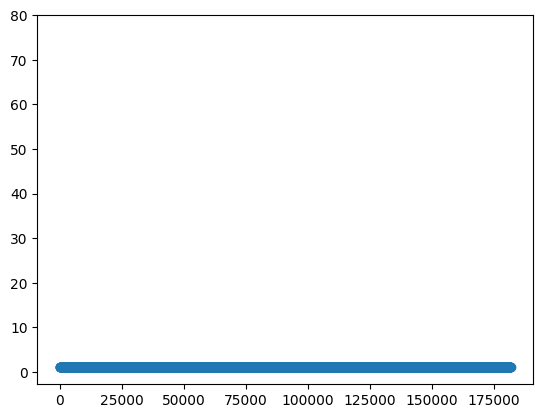

In [26]:
video_framerate = 38.02
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]

for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    print(each_path)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        print(f['fly-id'][()])
        if 'roi data' in f.keys():
            roi_data = f['roi data'][()]
            # print(roi_data[0:10])
            # print(roi_data[0][0])
            if 'Mean' in str(roi_data[0][0]):
                print(True)
            #print(peaks.is_column_mean(roi_data, 0, 0))
            print(np.shape(roi_data))
            data_peaks, properties, columns = peaks.get_peaks(roi_data, each_path, video_framerate, prominence = 10)
            print(np.shape(data_peaks))
            # print(properties)
            # print(properties['left_bases'])
            peaks.add_to_h5(each_path, 'roi peak left bases', properties['left_bases'])
            plt.scatter(data_peaks[0], np.ones(len(data_peaks[0])))
            plt.plot(columns)
            plt.show()
        if 'voltage data' in f.keys():
            voltage_data = f['voltage data'][()]
            voltage_header = f['voltage_header'][()]
            voltage_data_st = f['voltage data st'][()]
            #voltage_path = 
            #voltage_peaks, voltage_properties, voltage_columns = peaks.get_peaks(voltage_data, each_path, voltage_framerate)


In [23]:
print(data_peaks)

[array([    55,     82,    136, ..., 181749, 181778, 181936], dtype=int64)]


In [13]:
print(os.listdir(voltage_path))
light_peaks_file = os.path.join(voltage_path, 'fly2_light_peaks.h5')

with h5py.File(light_peaks_file, 'r') as f:
    print(f.keys())
    light_peaks_ms = f['light peaks ms'][()]


['fly1_func-001_Cycle00001_VoltageRecording_001.csv', 'fly2_func-001_Cycle00001_VoltageRecording_001.csv', 'fly2_light_peaks.h5', 'fly3_func-003_Cycle00001_VoltageRecording_001.csv', 'fly4_func-000_Cycle00001_VoltageRecording_001.csv', 'fly4_light_peaks.h5']
<KeysViewHDF5 ['light peaks ms']>


In [ ]:
print(len(mean_titles[0][0]))
for i in mean_titles[0][0]:
    if "Input 0" in str(i):
        print(f'yes{i}')

#single = peaks.get_means(voltage_data, mean_indices)
print(peaks.is_column_in_list(str(voltage_data), 0, 0, 'Input 0'))
print(str(voltage_data[0][0]))
print(single)

C:/Users/ashsm/Documents/Stanford/bruker behavior/h5files_dlc/20230616_fly2_dlc.h5
E:/bruker_vid_2023/20230616/results/h5_files/20230616_fly_number_2_.h5
['20230616_fly_number_1_.h5', '20230616_fly_number_2_.h5', '20230616_fly_number_3_.h5', '20230616_fly_number_4_.h5']
<KeysViewHDF5 ['DLC peaks unfiltered', 'difference', 'extend_likelihood', 'extend_x', 'extend_y', 'extension difference', 'head_likelihood', 'head_x', 'head_y', 'median and std filtered DLC peaks', 'median filtered DLC peaks', 'neck difference', 'neck_likelihood', 'neck_x', 'neck_y', 'proboscis_likelihood', 'proboscis_x', 'proboscis_y']>
<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'roi data', 'roi peak left bases', 'roi peak prominences', 'video framerate', 'voltage data', 'voltage data st', 'voltage_header']>


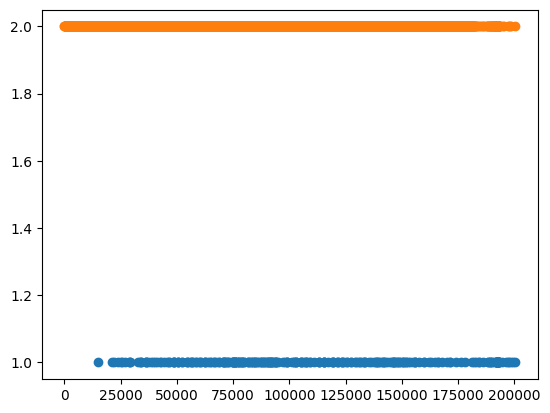

[b'Time(ms)' b' Input 0' b' per_cam_trigger']


In [28]:
print(dlc_h5_file)
print(roi_h5_file)
print(os.listdir(SavePath))

with h5py.File(dlc_h5_file, 'a') as f:
        print(f.keys())
        dlc_filtered_peaks = f['median and std filtered DLC peaks'][()]

with h5py.File(roi_h5_file, 'a') as f:
        print(f.keys())
        roi_peaks = f['PER peaks'][()]
        roi_peaks_s = f['PER peaks sec'][()]
        voltage_data = f['voltage data'][()]
        voltage_header = f['voltage_header'][()]
        #onsets = f[]

plt.scatter(dlc_filtered_peaks, np.ones(len(dlc_filtered_peaks)))
plt.scatter(roi_peaks, np.ones(len(roi_peaks))*2)
plt.show()
print(voltage_header)

In [ ]:
print(voltage_data)

voltage_peaks, voltage_properties, voltage_columns = peaks.get_peaks(voltage_data, roi_h5_file, voltage_framerate)

### why isn't it running light peaks?

In [ ]:
with h5py.File(roi_h5_file, 'a') as f:
    print(f.keys())

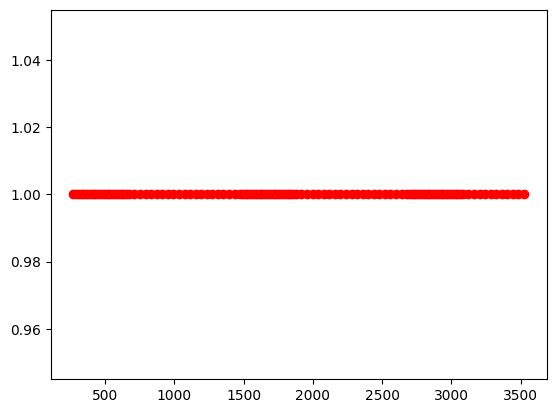

s []
[]
0
270
[ 14961  21125  22036  23730  25017  25657  26965  28536  29169  29198
  32648  33457  34097  34173  36392  36410  36444  37105  38352  39580
  40333  41208  42418  42819  44402  45519  46565  46597  48282  48744
  48758  48945  50545  50580  50610  52474  52499  54599  54639  55104
  56232  56464  56548  56991  58586  58599  60004  60445  60734  62327
  62618  62633  64053  64729  65364  66488  66710  67496  68638  68734
  70614  70628  70758  70789  71588  71687  72336  72727  73347  74708
  74831  74914  75025  75104  75692  75727  75756  75789  75890  76722
  76755  77737  77756  77791  78703  78784  78818  78842  79718  79870
  81843  81858  81886  82768  83015  83843  83881  84838  84867  84891
  85858  86080  86971  87390  87899  87936  88608  88866  89075  89883
  90110  90350  90982  91010  91477  91856  91915  92068  92509  92932
  93131  93707  93949  94198  94269  95048  96988  98303  98929  99074
  99137 101108 102074 102295 103074 103144 103175 105134 105294

In [25]:
#plt.scatter(dlc_filtered_peaks, np.ones(len(dlc_filtered_peaks)))
plt.scatter(roi_peaks_s, np.ones(len(roi_peaks))*2)
plt.scatter(light_peaks_ms/1000, np.ones(len(light_peaks_ms)), color = 'red')
#plt.xlim(20000,25000)
plt.show()
print('s', roi_peaks_s)
print(roi_peaks)
print(len(roi_peaks))
print(len(dlc_filtered_peaks))
print(dlc_filtered_peaks)
print(roi_peaks_s)

In [ ]:
for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        print(f['fly-id'][()])
        #print(f['roi data'][()])
        print(f['PER peaks'][()])

In [9]:
video_framerate = 38.02
framerate = 38.02

## get peaks per second rather than frames
data_peaks_sec = np.array(data_peaks) / video_framerate ##rois will always be retrieved from video
#voltage_peaks_sec = np.array(voltage_peaks) / voltage_framerate #voltage will always have the same framerate

#plt.plot(data_peaks_sec[0])
plt.scatter(data_peaks_sec[0], np.ones(len(data_peaks_sec[0])))
plt.scatter(light_peaks_ms, np.ones(len(light_peaks_ms)))
plt.xlim(500,600)
plt.show()
print(data_peaks_sec)
print(np.shape(data_peaks_sec[0]))

print(np.shape(columns))
print(columns[0][0:10])
print(len(columns[0]))
plt.plot(columns[0][0:5000]/framerate)
plt.scatter(data_peaks_sec[0][0:5000], np.ones(len(data_peaks_sec[0][0:5000]))*.5, color = 'orange', s = 2)
plt.xlim(0,500)
plt.show()


# ##find peak onsets

# PER_onsets_matrix_sec = get_onsets_matrix(PER_peaks_sec, data, PER_columns, identifier = 'PER')
# light_onsets_matrix_sec = get_onsets_matrix(light_peaks_sec, light_data[data_index], light_columns, identifier = 'light')
# light_onset_indices = light_peak_properties['left_bases']
# PER_onset_indices = PER_peak_properties['left_bases']

NameError: name 'data_peaks' is not defined

In [ ]:
## goal: import DLC behavior for 6-16 fly and compare to roi peaks
## secondary goal: compare light flashes with voltage to see if I can sort out the framerate

#DLC files

In [8]:
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]

for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        onsets = np.array(f['roi peak left bases'])
        framerate = f['video framerate'][()]
        onsets_sec = onsets / framerate
        plt.scatter(onsets_sec, np.ones(len(onsets_sec)))
        data = f['roi data'][()]
        print(type(data))
        #data = np.frombuffer(data, dtype = np.float64)
        print(np.shape(data))
        plt.show()
        plt.plot(range(len(data[1:,0]))* framerate, data[1:,0])
        
        #plt.plot(f['roi data'][0:200])
        plt.title(f"{f['fly-id'][()]} onsets")
        plt.xlim(0,200)
        plt.show()
        print(f['roi data'][0:500])
        


<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'voltage data', 'voltage data st', 'voltage_header']>


KeyError: "Unable to open object (object 'roi peak left bases' doesn't exist)"

In [ ]:
# print(data)
# plt.plot(data)
print(np.shape(data))
print(type(data))
print(type(data[0]))
print(data[0:10])
plot_data = data[1:500,0]
# print(type(data[1][0]))
# print(data[1][0])
plt.plot(range(len(plot_data))/framerate, plot_data)
plt.plot()
#print(data[1:,0])
plt.show()

In [ ]:
print(plot_data[0:50])
print(plot_data[-50:-1])

#plt.plot(plot_data[-50:-1])
start = 300
stop = 1000
for point_i in range(len(plot_data[start:stop])):
    point = plot_data[start:stop][point_i]
    plt.scatter(point_i*framerate, point, s= 1, color = 'k')
    